In [1]:
import numpy as np
import pandas as pd
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt

import requests
import time
import ast
import random

# Spotipy
from dotenv import load_dotenv
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import warnings
warnings.filterwarnings("ignore")

from my_functions import *

In [2]:
# import the dataframes
df_masters = pd.read_csv('Datasets/df_masters.csv')               # albums from the UK and US (until 2000) with >= 20 votes 
df_ratings_20 = pd.read_csv('Datasets/df_ratings_20.csv', keep_default_na=False)  # albums with >= 20 votes, mostly from rock, worldwide
df_masters_blended = pd.read_csv('Datasets/df_masters_blended.csv')               # albums from the UK and US (until 2000) with >= 20 votes 

# print information
print(f'{df_masters.shape}: df_masters')
print(f'{df_ratings_20.shape}: df_ratings_20')
print(f'{df_masters_blended.shape}: df_masters_blended')

(11346, 13): df_masters
(51222, 5): df_ratings_20
(9667, 13): df_masters_blended


In [3]:
df_masters.head()

,artist_id,master_id,main_release_id,release_country,artist,title,year,album_length,tracks,release_type,genres,styles,artist_profile
0,2190314,3731373,32952558,US,Just Surrender,Phoenix,2010,0.00,13,['Album'],['Rock'],"['Alternative Rock', 'Pop Punk']","Band from Dover Plains, New York, formerly kno..."
1,315009,3624404,1233426,US,Saccharine Trust,"Surviving You, Always",1984,39.70,12,"['LP', 'Album']",['Rock'],"['Punk', 'Avantgarde', 'Experimental']","American rock band from California, formed in ..."
2,983148,3466594,1098693,US,Skycamefalling,10.21,2000,63.65,12,"['Album', 'Enhanced']",['Rock'],"['Metalcore', 'Post-Hardcore']","Metalcore band from Long Island, NY."
3,108050,3347596,11050388,US,Daniel Johnston,Songs of Pain,1983,0.00,21,['Album'],['Rock'],['Lo-Fi'],"Daniel Johnston (born January 22, 1961, Sacram..."
4,492915,3092328,2476600,UK,Skyclad,A Semblance of Normality,2004,47.33,13,['Album'],['Rock'],['Folk Rock'],Skyclad was formed in 1990 by Martin Walkyier ...


# **``album_length``**

In [4]:
df = df_masters
df.shape

(11346, 13)

In [5]:
percentage_album_length_missing = round((df['album_length']==0).sum() / df.shape[0] * 100, 2)

print(f"albums missing album_length: {(df['album_length']==0).sum()} ")
print(f'% missing album_length: {percentage_album_length_missing}%')

albums missing album_length: 2201 
% missing album_length: 19.4%


In [6]:
df_length_0 = df[df['album_length']==0].sort_values(['artist', 'year', 'title'])
df_length_0.shape

(2201, 13)

In [18]:
df_length_0.iloc[5:15]

,artist_id,master_id,main_release_id,release_country,artist,title,year,album_length,tracks,release_type,genres,styles,artist_profile
5423,39775,30521,1615490,UK,10cc,Deceptive Bends,1977,0.0,9,"['LP', 'Album', 'Stereo']",['Rock'],['Pop Rock'],"Major 70s UK (founded in Stockport, Greater Ma..."
11075,317719,107693,1611310,US,16,Bridges to Burn,2009,0.0,12,"['LP', 'Album', 'Limited Edition']",['Rock'],"['Hardcore', 'Downtempo', 'Southern Rock']","American sludge metal band from San Diego, Cal..."
151,21148,702877,3947624,UK,23 Skidoo,Seven Songs,1982,0.0,8,['Album'],"['Electronic', 'Rock']","['Tribal', 'Industrial']",23 Skidoo are a British band playing a fusion ...
10670,513958,0,4834521,US,3,Summercamp Nightmare,2003,0.0,12,['Album'],['Rock'],"['Prog Rock', 'Heavy Metal']",American progressive rock/metal band from Wood...
10624,513958,429178,9441550,US,3,Wake Pig,2004,0.0,11,['Album'],['Rock'],"['Alternative Rock', 'Hard Rock', 'Heavy Metal']",American progressive rock/metal band from Wood...
10621,513958,429183,3436139,US,3,The End is Begun,2007,0.0,13,['Album'],['Rock'],['Heavy Metal'],American progressive rock/metal band from Wood...
10697,333297,0,1738205,US,40 Below Summer,Rain,2007,0.0,12,"['Album', 'Reissue']",['Rock'],"['Alternative Metal', 'Nu Metal']",40 Below Summer is an American nu metal band f...
6194,253271,17234,381848,US,7 Seconds,The Crew,1984,0.0,18,"['LP', 'Album']",['Rock'],"['Punk', 'Hardcore']","Punk band originally from Reno, Nevada, formed..."
6195,253271,17226,3944276,US,7 Seconds,New Wind,1986,0.0,13,"['LP', 'Album']",['Rock'],"['Punk', 'Hardcore']","Punk band originally from Reno, Nevada, formed..."
5392,11203,30962,1453338,UK,A Certain Ratio,The Graveyard and The Ballroom,1980,0.0,16,['Album'],"['Electronic', 'Rock']","['Leftfield', 'New Wave']",British post punk & indie funk band formed in ...


**Albums with ``album_length = 0`` that I've gotten with Spotipy**

In [9]:
df_lengths_missing_concat = pd.read_csv('Datasets/df_lengths_missing_concat.csv')
df_lengths_missing_concat.shape

(1922, 5)

In [17]:
df_lengths_missing_concat.iloc[4:10]

,artist,title,name,album_length,tracks
4,10cc,Deceptive Bends,deceptive bends,51.21,12
5,23 Skidoo,Seven Songs,seven songs,71.22,14
6,2:54,2:54,2:54,41.95,10
7,7 Seconds,The Crew,the crew,30.01,24
8,7 Seconds,New Wind,new wind,38.97,14
9,A Global Threat,Until We Die,until we die,27.51,14


**Albums that still have ``album_length = 0`` and I haven't gotten with Spotipy**

In [34]:
df_length_to_do = df_length_0[~df_length_0['title'].isin(df_lengths_missing_concat['title'].values)]
df_length_to_do.shape

(1044, 13)

In [36]:
df_length_to_do.head(10)

,artist_id,master_id,main_release_id,release_country,artist,title,year,album_length,tracks,release_type,genres,styles,artist_profile
11125,371750,326966,1117204,US,108,A New Beat From A Dead Heart,2007,0.0,13,"['LP', 'Album']",['Rock'],['Hardcore'],"Metallic hardcore band from New York City, USA..."
11075,317719,107693,1611310,US,16,Bridges to Burn,2009,0.0,12,"['LP', 'Album', 'Limited Edition']",['Rock'],"['Hardcore', 'Downtempo', 'Southern Rock']","American sludge metal band from San Diego, Cal..."
10670,513958,0,4834521,US,3,Summercamp Nightmare,2003,0.0,12,['Album'],['Rock'],"['Prog Rock', 'Heavy Metal']",American progressive rock/metal band from Wood...
10624,513958,429178,9441550,US,3,Wake Pig,2004,0.0,11,['Album'],['Rock'],"['Alternative Rock', 'Hard Rock', 'Heavy Metal']",American progressive rock/metal band from Wood...
10621,513958,429183,3436139,US,3,The End is Begun,2007,0.0,13,['Album'],['Rock'],['Heavy Metal'],American progressive rock/metal band from Wood...
10697,333297,0,1738205,US,40 Below Summer,Rain,2007,0.0,12,"['Album', 'Reissue']",['Rock'],"['Alternative Metal', 'Nu Metal']",40 Below Summer is an American nu metal band f...
5392,11203,30962,1453338,UK,A Certain Ratio,The Graveyard and The Ballroom,1980,0.0,16,['Album'],"['Electronic', 'Rock']","['Leftfield', 'New Wave']",British post punk & indie funk band formed in ...
10523,992312,176104,3397211,US,A Day In Black And White,Notes,2005,0.0,11,['LP'],['Rock'],"['Emo', 'Punk', 'Indie Rock']",American indie rock band from Washington D.C.
10955,2226494,739888,6145762,US,A Great Big Pile of Leaves,Have You Seen My Prefrontal Cortex?,2010,0.0,13,['Album'],['Rock'],"['Pop Rock', 'Indie Rock']","An indie-rock band from Brooklyn, New York for..."
11066,1915201,348342,2403844,US,A Pale Horse Named Death,And Hell Will Follow Me,2010,0.0,13,"['Album', 'Limited Edition']",['Rock'],"['Alternative Rock', 'Goth Rock']",A Pale Horse Named Death is an American Rock/M...


In [61]:
df_length_to_do.to_csv('Datasets/df_length_to_do.csv', index=False)

## **``Spotipy`` (Spotify API)**

In [7]:
load_dotenv()

True

In [8]:
user = os.getenv('client_id')
password = os.getenv('client_secret')

# Initialize Spotipy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id = user,
                                                           client_secret = password), requests_timeout=10)

### Testing

In [24]:
def get_all_albums(artist_id):
    albums = []
    results = sp.artist_albums(artist_id, limit=50)  # First request

    while results:
        albums.extend(results['items'])  # Store the albums
        if results['next']:  # Check if there's another page
            results = sp.next(results)  # Fetch next page
        else:
            break  # Stop when no more pages

    return albums

In [22]:
artist = '108'

results = sp.search(q = artist
                    , type = 'artist'
                    , limit = 5)

# theorically the artist should be the first result
artist_name = results['artists']['items'][0]['name']
artist_id = results['artists']['items'][0]['id'] # get the artist_id

if artist_name.lower() == artist.lower():
    print(f"artist found: {artist_name} with id '{artist_id}'")
else:
    print(f"Cannot find '{artist}', try some other one")

artist found: 108 with id '3j2S24uHONLPeKvYjG14oH'


In [26]:
albums = get_all_albums(artist_id)

In [27]:
for i in albums:
    print(i['name'])

18.61
A New Beat from a Dead Heart
Creation. Sustenance. Destruction.
Songs Of Separation
Violent World: A Tribute To The Misfits


In [28]:
artist = '108'
title = 'A New Beat From A Dead Heart'

results = sp.search(q = artist
                    , type = 'artist'
                    , limit = 5)

artists = results['artists']['items']
artists_ids = results['artists']['items'] # get the artist_id

for i in range(len(artists)):
    # artist = artists[i]['name']
    try:
        # look for my artist
        if artist.lower().replace('and', '&') == artists[i]['name'].lower():
            # if it finds my artist:
            artist_id = artists_ids[i]['id']
            print('artist found')
            print(artist)

            artist_albums = get_all_albums(artist_id)

            for album in artist_albums:

                print(album['name'])

                # look for my album
                if album['name'].lower().replace('and', '&') == (title.lower().replace('and', '&')):
                    print('album found')
                    album_id = album['id']
                    results = sp.album(album_id)
                    tracks = results['tracks']['items']
                    song_durations = [song['duration_ms']/60000 for song in tracks]
                    
                    album_length = round(sum(song_durations), 2)

                    break   # once it finds the album, stop
    except:
        print('error')            

artist found
108
18.61
A New Beat from a Dead Heart
album found
artist found
108
Mission Infinite
artist found
108
05s identity
Metta Muzik, Vol. 2
Flex skill
RE:BORN
OVER THE BORDER
kitanoshiro (feat. 108)
Empty Heart (feat. ZiiFlex a.k.a ZIMA) [Remix]


In [29]:
album_length

34.65

Here we can see that the album is found, though not on the exact same name, it doesn't do an exact match because there are other parts in the title, such as **'Deluxe Edition'** or **'Remastered'**

In [1078]:
len(artist_albums)

31

In [1082]:
artist_albums[0]['name']

'Kings of the Wild Frontier (Deluxe Edition)'

In [952]:
artist_id

'2jK54ZlZhTF1TxygsVeR05'

### **define the functions**

In [30]:
def get_album_length(df):
    count = 0
    scraped = 0

    # create empty lists
    artists_list = []
    albums_list = []
    albums_lengths = []
    tracks_list = []
    album_name_list = []

    for artist in df['artist'].unique():
        time.sleep(1)

        results = sp.search(q = artist
                            , type = 'artist'
                            , limit = 5)

        artists = results['artists']['items']
        artists_ids = results['artists']['items'] # get the artist_id

        for i in range(len(artists)):
            artist_name = artists[i]['name'].lower()
            artist_name_and = artist.replace('and', '&').lower()
            try:
                # look for my artist
                if artist_name == artist.lower() or artist_name == artist_name_and:
                    
                    # if it finds my artist:
                    artist_id = artists_ids[i]['id']
                    artist_albums = get_all_albums(artist_id)
                    
                    for title in df[df['artist']==artist]['title'].values:
                        time.sleep(1)
                        count+=1
                        title_clean = title.replace('and', '&').lower()

                        for album in artist_albums:
                            album_name = album['name'].lower()
                               
                            if title_clean == album_name:
                                artists_list.append(artist)
                                albums_list.append(title)
                                album_name_list.append(album_name)

                                album_id = album['id']
                                results = sp.album(album_id)
                                tracks = results['tracks']['items']
                                tracks_list.append(len(tracks))
                                
                                song_durations = [song['duration_ms']/60000 for song in tracks]
                                
                                album_length = round(sum(song_durations), 2)
                                albums_lengths.append(album_length)
                                scraped+=1

                            # once it finds the album, stop
                                print(f"{scraped}/{count}: {artist} - {title}, exact match")
                                break
                        else:
                            for album in artist_albums:
                                album_name = album['name'].lower()

                                if title_clean in album_name:
                                    artists_list.append(artist)
                                    albums_list.append(title)
                                    album_name_list.append(album_name)

                                    album_id = album['id']
                                    results = sp.album(album_id)
                                    tracks = results['tracks']['items']
                                    tracks_list.append(len(tracks))

                                    song_durations = [song['duration_ms']/60000 for song in tracks]
                                    
                                    album_length = round(sum(song_durations), 2)
                                    albums_lengths.append(album_length)
                                    scraped+=1

                                # once it finds the album, stop
                                    print(f"{scraped}/{count}: {artist} - {title}, similar match")
                                    break

                # when it checks all the albums of that artist, stop    
                    break

            except:
                print('error')
                albums_lengths.append(np.nan)
                tracks_list.append(np.nan)
                break

        lists = [artists_list, albums_list, album_name_list, albums_lengths, tracks_list]

    # Check if all lists have the same length
        lengths = [len(lst) for lst in lists]

        if len(set(lengths)) != 1:
            print("Lengths are not the same.")
            break # stop the loop, I won't be able to store the data if I have one value missing

    df_lengths_missing = pd.DataFrame({'artist': artists_list,
                                    'title': albums_list,
                                    'name': album_name_list,
                                    'album_length': albums_lengths,
                                    'tracks': tracks_list})
    return df_lengths_missing

In [9]:
def get_all_albums(artist_id):
    albums = []
    results = sp.artist_albums(artist_id, limit=50)  # First request

    while results:
        albums.extend(results['items'])  # Store the albums
        if results['next']:  # Check if there's another page
            results = sp.next(results)  # Fetch next page
        else:
            break  # Stop when no more pages

    return albums

**La següent funciona però no és la millor**

In [160]:
def get_album_length(df):
    count = 0
    scraped = 0

    # create empty lists
    artists_list = []
    albums_list = []
    albums_lengths = []
    tracks_list = []

    for artist, title in df[['artist', 'title']].values:
        time.sleep(1)
        count+=1

        artists_list.append(artist)
        albums_list.append(title)

        results = sp.search(q = artist
                            , type = 'artist'
                            , limit = 5)

        artists = results['artists']['items']
        artists_ids = results['artists']['items'] # get the artist_id

        for i in range(len(artists)):
            artist_name = artists[i]['name'].lower()
            artist_name_and = artist.replace('and', '&').lower()
            try:
                # look for my artist
                if artist_name == artist.lower() or artist_name == artist_name_and:
                    # if it finds my artist:
                    artist_id = artists_ids[i]['id']

                    artist_albums = get_all_albums(artist_id)

                    for album in artist_albums:
                        album_name = album['name'].lower()        
                        title_name_and = title.replace('and', '&').lower()
                        if title.lower() in album_name or title_name_and in album_name:
                            album_id = album['id']
                            results = sp.album(album_id)
                            tracks = results['tracks']['items']
                            tracks_list.append(len(tracks))
                            song_durations = [song['duration_ms']/60000 for song in tracks]
                            
                            album_length = round(sum(song_durations), 2)
                            albums_lengths.append(album_length)
                            scraped+=1
                            break   # once it finds the album, stop
                    else:
                        continue
                    break 
            except:
                print('error')
                albums_lengths.append(np.nan)
                tracks_list.append(np.nan)
                break
        
        else:
            albums_lengths.append(np.nan)
            tracks_list.append(np.nan)

        print(f"{scraped}/{count}: {artist} - {title}")

        lists = [artists_list, albums_list, albums_lengths, tracks_list]

    # Check if all lists have the same length
        lengths = [len(lst) for lst in lists]
        if len(set(lengths)) != 1:
            print("Lengths are not the same.")
            break # stop the loop, I won't be able to store the data if I have one value missing

    df_lengths_missing = pd.DataFrame({'artist': artists_list,
                                    'title': albums_list,
                                    'album_length': albums_lengths,
                                    'tracks': tracks_list})
    return df_lengths_missing

### **Get the ``album_length`` from Spotipy**

In [ ]:
start_index = 300
end_index = start_index + 100

df_lengths_missing = get_album_length(df_length_to_do.iloc[start_index:end_index])
df_lengths_missing.shape

1/2: Corpus Christi - The Darker Shades Of White, exact match
2/5: Crime In Stereo - I Was Trying to Describe You to Someone, exact match
3/8: Damien Jurado - Caught In the Trees, exact match
4/9: Damiera - M(US)IC, exact match
5/10: Daniel Striped Tiger - Capital Cities, exact match


6/12: Dark Castle - Spirited Migration, exact match
7/13: Darkest Hour - So Sedated, so Secure, similar match
8/15: Dax Riggs - Say Goodnight To The World, exact match
9/16: Dead Hearts - Bitter Verses, exact match
10/17: Dead Meadow - Howls From the Hills, exact match
11/19: Dead Poetic - Vices, exact match
12/21: Dead to Me - Cuban Ballerina, exact match
13/22: Dead to Me - African Elephants, exact match
14/23: Death Before Dishonor - Count Me In, exact match
15/24: Death Cab for Cutie - You Can Play These Songs With Chords, exact match
16/26: Decyfer Down - End of Grey, exact match
17/27: Deer Tick - The Black Dirt Sessions, exact match
18/28: Defiance, Ohio - The Fear, The Fear, The Fear, exact match
19/29: Defiance, Ohio - Midwestern Minutes, exact match
20/30: Dekapitator - The Storm Before The Calm, exact match
21/31: Derek Sherinian - Blood of the Snake, exact match
22/33: Dillinger Four - Situationist Comedy, exact match
23/34: Dirty Projectors - The Glad Fact, exact match
24/

(62, 5)

In [12]:
minutes = 17
attempts = 434

seconds_per_attempt = minutes*60/attempts
seconds_per_attempt 

2.3502304147465436

In [56]:
df_lengths_missing.sort_values('tracks', ascending=False).head()

,artist,title,name,album_length,tracks
26,Drive-By Truckers,Southern Rock Opera,southern rock opera,93.91,20
14,Death Cab for Cutie,You Can Play These Songs With Chords,you can play these songs with chords,66.91,18
27,Dropkick Murphys,Do or Die,do or die,40.13,16
52,Far-Less,A Toast to Bad Taste,a toast to bad taste,50.65,16
23,Dommin,Love Is Gone,love is gone,51.69,15


<Axes: xlabel='tracks'>

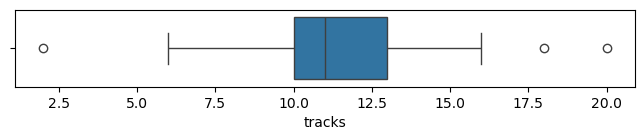

In [57]:
plt.figure(figsize=(8,1))
sns.boxplot(x=df_lengths_missing['tracks'])

In [58]:
df_lengths_missing.sort_values('album_length', ascending=False).head()

,artist,title,name,album_length,tracks
24,Dream Theater,Chaos in Motion,chaos in motion 2007 - 2008,155.14,12
26,Drive-By Truckers,Southern Rock Opera,southern rock opera,93.91,20
14,Death Cab for Cutie,You Can Play These Songs With Chords,you can play these songs with chords,66.91,18
30,Eagle Twin,The Unkindness of Crows,the unkindness of crows,64.88,7
59,Forbidden,Omega Wave,omega wave,61.92,12


<Axes: xlabel='album_length'>

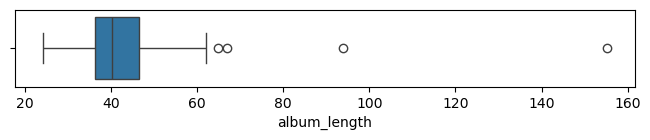

In [59]:
plt.figure(figsize=(8,1))
sns.boxplot(x=df_lengths_missing['album_length'])

In [60]:
df_lengths_missing.to_csv('Datasets/df_lengths_missing4.csv', index=False)

In [22]:
df_lengths_missing_1 = pd.read_csv('Datasets/df_lengths_missing_1.csv')
df_lengths_missing_1.shape

(1116, 5)

In [23]:
df_lengths_missing_2 = pd.read_csv('Datasets/df_lengths_missing_2.csv')
df_lengths_missing_2.shape

(434, 5)

In [24]:
df_lengths_missing_3 = pd.read_csv('Datasets/df_lengths_missing_3.csv')
df_lengths_missing_3.shape

(174, 5)

In [25]:
df_lengths_missing_4 = pd.read_csv('Datasets/df_lengths_missing_4.csv')
df_lengths_missing_4.shape

(198, 5)

In [26]:
df_lengths_missing_concat = pd.concat([df_lengths_missing_1, df_lengths_missing_2, df_lengths_missing_3, df_lengths_missing_4])
df_lengths_missing_concat.shape

(1922, 5)

In [27]:
df_lengths_missing_concat.to_csv('Datasets/df_lengths_missing_concat.csv', index=False)

<Axes: xlabel='tracks'>

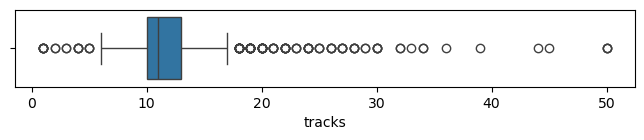

In [318]:
plt.figure(figsize=(8,1))
sns.boxplot(x=df_lengths_missing_concat['tracks'])

<Axes: xlabel='album_length'>

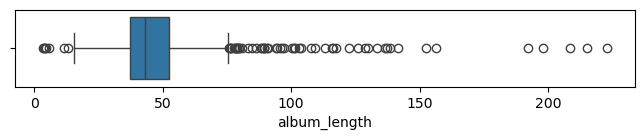

In [319]:
plt.figure(figsize=(8,1))
sns.boxplot(x=df_lengths_missing_concat['album_length'])

In [11]:
df_length_0['artist'].value_counts().head(10)

artist
The Fall              10
The Kinks             10
Hawkwind              10
Pink Floyd             9
The Mountain Goats     9
Genesis                9
Elton John             9
The Who                8
The Beatles            8
Black Sabbath          8
Name: count, dtype: int64

In [12]:
df_length_0.shape

(2234, 13)

In [13]:
df_length_0['artist'].nunique()

1442